# Repaso - Módulo 2

---
## Problema 1.1. Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [110]:
import numpy as np 
import matplotlib.pyplot as pt
import pandas as pd
%matplotlib inline

In [111]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b-a)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [37]:
# log(x) = np.log10(x)
# ln(x) = np.log(x)
# e^x = np.exp(x)

def f1(x):
    return np.sqrt(1+x**4)

def f2(x):
    return np.log(np.log(x))

def f3(x):
    return 1/(np.log(x))

def f4(x):
    return np.exp(-x**2/2)

In [45]:
N = np.logspace(1, 5, 5)
resultados = [20.3583, 0.405885, 0.667, 0.00007866]

table = pd.DataFrame(index=N, columns=["A1", "Error 1", "A2", "Error 2", "A3", "Error 3", "A4", "Error 4"])

for i in N:
    table.loc[i, "A1"] = montecarlo(f1, int(i), 4, 5)
    table.loc[i, "A2"] = montecarlo(f2, int(i), 4, 5)
    table.loc[i, "A3"] = montecarlo(f3, int(i), 4, 5)
    table.loc[i, "A4"] = montecarlo(f4, int(i), 4, 5)

table["Error 1"] = np.abs(resultados[0] - table["A1"])
table["Error 2"] = np.abs(resultados[1] - table["A2"])
table["Error 3"] = np.abs(resultados[2] - table["A3"])
table["Error 4"] = np.abs(resultados[3] - table["A4"])

table

,A1,Error 1,A2,Error 2,A3,Error 3,A4,Error 4
10.0,21.880414,1.522114,0.425004,0.019119,0.66137,0.00563,0.000096,0.000018
100.0,20.103173,0.255127,0.402298,0.003587,0.664246,0.002754,0.000087,0.000009
1000.0,20.19305,0.16525,0.4024,0.003485,0.666362,0.000638,0.00008,0.000001
10000.0,20.342766,0.015534,0.406287,0.000402,0.666653,0.000347,0.00008,0.000001
100000.0,20.364095,0.005795,0.405932,0.000047,0.667044,0.000044,0.000078,0.0


## Problema 1.2.
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

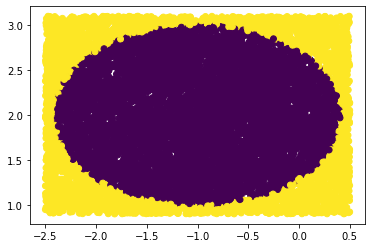

In [19]:
x = np.random.uniform(-2.5, 0.5, 10000)
y = np.random.uniform(0.9, 3.1, 10000)
X, Y = np.meshgrid(x, y)
pt.figure()
pt.scatter(x, y, c=~bernoulli(x, y))

In [16]:
import matplotlib.pyplot as pt
import pandas as pd
import numpy as np
%matplotlib inline

def montecarlo2(region, ax, bx, ay, by, N):
    x = np.random.uniform(ax, bx, int(N))
    y = np.random.uniform(ay, by, int(N))
    B = region(x, y)
    AR = (bx - ax)*(by - ay)
    error = np.sqrt((1-np.mean(B))/(np.mean(B)))
    return error, np.mean(B)*AR
def bernoulli(x, y):
    return x**2+2*y**2 <= -2*x+8*y-7

N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=["Aproximación", "Error"], index=N)

for i in N:
    table.loc[i, "Aproximación"] = montecarlo2(bernoulli, -2.5, 0.5, 0.9, 3.1, i)[1]
    table.loc[i, "Error"] = montecarlo2(bernoulli, -2.5, 0.5, 0.9, 3.1, i)[0]
print(table)

         Aproximación     Error
10.0             4.62       0.5
100.0           4.092  0.654654
1000.0          4.257  0.671847
10000.0        4.4253  0.691044
100000.0     4.448862  0.700398


---
## Problema 2. Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [60]:
import pandas as pd
import numpy as np

In [61]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [63]:
import random
random.seed(80)

x = [0]
y = [0]

x[-1]

for k in range(10**5):
    i_actual = random.choices(i, weights=df["$p_i$"])
    
    a = float(df["$a_i$"][i_actual])
    b = float(df["$b_i$"][i_actual])
    c = float(df["$c_i$"][i_actual])
    d = float(df["$d_i$"][i_actual])
    e = float(df["$e_i$"][i_actual])
    f = float(df["$f_i$"][i_actual])
    
    xkm1 = a*x[-1] + b*y[-1] + e
    ykm1 = c*x[-1] + d*y[-1] + f
    
    x.append(xkm1)
    y.append(ykm1)


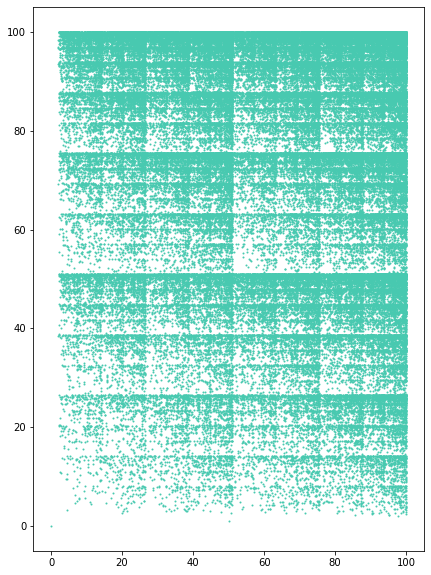

In [65]:
pt.figure(figsize=(7, 10))
pt.scatter(x, y, s=1, c="#48C9B0")


---
## Problema 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

adata = web.DataReader("AAPL", "yahoo", "2015-01-01", "2019-12-31")["Adj Close"]
mdata = web.DataReader("MSFT", "yahoo", "2015-01-01", "2019-12-31")["Adj Close"]



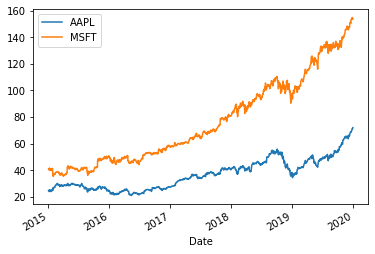

In [3]:
adata.plot(label="AAPL")
mdata.plot(label="MSFT")
pt.legend()

Calcule los rendimientos diarios junto con sus características estadísticas

<AxesSubplot:xlabel='Date'>

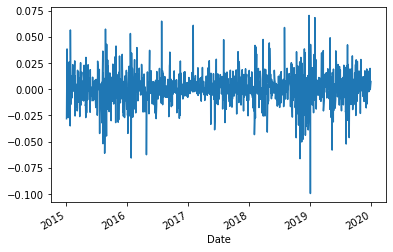

In [4]:
Ra = (adata - adata.shift())/adata.shift()
ra = np.log(adata/adata.shift())
Ra.plot()

<AxesSubplot:xlabel='Date'>

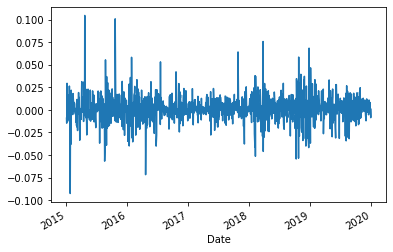

In [5]:
Rm = (mdata - mdata.shift())/mdata.shift()
rm = np.log(mdata/mdata.shift())
Rm.plot()

In [6]:
print("Datos de Apple:")
print(Ra.describe())
print("Datos de Microsoft:")
print(Rm.describe())

Datos de Apple:
count    1257.000000
mean        0.000976
std         0.015646
min        -0.099607
25%        -0.005857
50%         0.000893
75%         0.008918
max         0.070422
Name: Adj Close, dtype: float64
Datos de Microsoft:
count    1257.000000
mean        0.001161
std         0.014686
min        -0.092534
25%        -0.005401
50%         0.000868
75%         0.008053
max         0.104522
Name: Adj Close, dtype: float64


Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [9]:
def sim_r(media, std, inicio, dias, N):
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=r)

simulacion = sim_r(ra.mean(), ra.std(), "2020-01-01", 365, 1000)
simulacion

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,-0.028197,-0.010122,0.012213,-0.008636,0.005532,-0.001357,0.026627,-0.015335,0.015144,0.012042,...,-0.011213,-0.004976,0.018822,-0.011335,-0.030660,0.011971,0.014023,-0.008258,0.019380,0.008655
2020-01-02,-0.008801,0.001476,-0.006867,-0.015748,-0.007122,0.001092,-0.029636,-0.001812,-0.007489,0.004944,...,0.010724,-0.003586,-0.028838,0.010650,-0.007618,-0.000193,-0.001034,0.014558,-0.008125,0.009201
2020-01-03,-0.001976,0.004556,0.008432,0.006391,0.016579,0.000173,-0.008868,0.013709,0.013346,-0.047986,...,0.006444,0.012347,-0.003730,0.008931,-0.025897,-0.013564,-0.004173,-0.011261,0.004178,-0.001626
2020-01-04,0.021856,-0.017351,-0.018816,-0.002221,-0.011202,0.027397,0.021861,0.011202,0.029101,0.001384,...,0.010649,0.017593,0.025343,0.022541,-0.015137,-0.014498,-0.017969,0.000928,0.012819,0.014900
2020-01-05,-0.012405,-0.015494,0.031228,-0.005537,-0.028934,0.030710,0.001348,-0.011203,0.014172,-0.012482,...,-0.011937,0.008513,-0.009981,0.011891,-0.014361,0.008716,-0.021785,0.002161,-0.015986,0.000336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.016549,0.009156,-0.030325,0.017629,0.009022,0.005549,-0.012876,-0.003227,-0.006946,0.025843,...,0.018133,0.022796,-0.025331,-0.017516,0.023149,0.002668,0.001993,0.018415,0.012472,0.009280
2020-12-27,0.015581,-0.006353,0.002903,-0.021395,0.007582,0.011055,0.015580,0.004091,0.001292,-0.013274,...,0.023797,0.006704,0.015056,0.006011,-0.016240,-0.006988,-0.016555,-0.006701,-0.009533,0.000579
2020-12-28,-0.006747,-0.014220,-0.015828,-0.015455,-0.001729,0.008935,-0.011605,-0.008094,0.000175,0.002439,...,0.005074,0.043011,0.003009,0.014691,0.005569,-0.015492,0.005750,0.006839,-0.002970,0.003045
2020-12-29,-0.006964,-0.019872,0.004663,0.006744,-0.006490,-0.008803,-0.004755,0.003462,-0.021687,0.000955,...,0.018604,-0.014086,-0.017929,0.009746,-0.022196,0.000425,0.034272,0.024426,-0.017178,0.014360


Calcule los precios con base en los rendimientos simulados

In [12]:
simulacion_precios = (1 - simulacion).cumprod()*adata[-1]
simulacion_precios

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,74.071222,72.769091,71.160087,72.662006,71.641326,72.137621,70.121693,73.144639,70.948919,71.172392,...,72.847685,72.398346,70.683960,72.856478,74.248652,71.177503,71.029695,72.634753,70.643762,71.416369
2020-01-02,74.723132,72.661706,71.648763,73.806322,72.151566,72.058838,72.199838,73.277142,71.480220,70.820500,...,72.066467,72.657999,72.722376,72.080543,74.814259,71.191262,71.103141,71.577311,71.217737,70.759289
2020-01-03,74.870800,72.330639,71.044628,73.334592,70.955390,72.046349,72.840115,72.272604,70.526254,74.218923,...,71.602063,71.760910,72.993655,71.436757,76.751701,72.156887,71.399820,72.383326,70.920192,70.874320
2020-01-04,73.234402,73.585617,72.381395,73.497487,71.750212,70.072517,71.247791,71.463007,68.473891,74.116218,...,70.839548,70.498447,71.143762,69.826489,77.913489,73.203033,72.682812,72.316155,70.011081,69.818325
2020-01-05,74.142869,74.725771,70.121044,73.904477,73.826260,67.920609,71.151771,72.263632,67.503486,75.041345,...,71.685194,69.898329,71.853875,68.996174,79.032382,72.564995,74.266177,72.159857,71.130263,69.794850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,52.765232,38.931282,33.478615,60.409417,61.127387,76.203762,52.281477,60.687900,59.294442,36.869180,...,40.072334,64.396111,67.764565,86.300442,61.115481,55.296717,38.906255,59.388731,59.456278,68.956696
2020-12-27,51.943091,39.178612,33.381441,61.701852,60.663934,75.361333,51.466920,60.439652,59.217813,37.358571,...,39.118753,63.964412,66.744269,85.781692,62.108021,55.683144,39.550341,59.786694,60.023093,68.916775
2020-12-28,52.293576,39.735736,33.909797,62.655455,60.768832,74.687987,52.064193,60.928836,59.207459,37.267444,...,38.920264,61.213209,66.543436,84.521449,61.762139,56.545798,39.322921,59.377810,60.201385,68.706914
2020-12-29,52.657757,40.525380,33.751672,62.232921,61.163214,75.345468,52.311750,60.717884,60.491509,37.231850,...,38.196176,62.075477,67.736465,83.697700,63.132983,56.521741,37.975232,57.927452,61.235541,67.720262


Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [15]:
valor_deseado = adata[-1]*1.2
print(valor_deseado)
sobrepasa_deseado = simulacion_precios >= valor_deseado
print(sobrepasa_deseado)
probabilidad = sobrepasa_deseado.mean(axis=1)
probabilidad

86.4478546142578
              0      1      2      3      4      5      6      7      8    \
2020-01-01  False  False  False  False  False  False  False  False  False   
2020-01-02  False  False  False  False  False  False  False  False  False   
2020-01-03  False  False  False  False  False  False  False  False  False   
2020-01-04  False  False  False  False  False  False  False  False  False   
2020-01-05  False  False  False  False  False  False  False  False  False   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2020-12-26  False  False  False  False  False  False  False  False  False   
2020-12-27  False  False  False  False  False  False  False  False  False   
2020-12-28  False  False  False  False  False  False  False  False  False   
2020-12-29  False  False  False  False  False  False  False  False  False   
2020-12-30  False  False  False  False  False  False  False  False  False   

              9    ...    990    991    992    993    994 

2020-01-01    0.000
2020-01-02    0.000
2020-01-03    0.000
2020-01-04    0.000
2020-01-05    0.000
              ...  
2020-12-26    0.048
2020-12-27    0.046
2020-12-28    0.046
2020-12-29    0.047
2020-12-30    0.048
Freq: D, Length: 365, dtype: float64

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.